# Prepare the data


In [1]:
from img2vec_pytorch import Img2Vec
import torch
from PIL import Image
import tensorflow as tf
import torchvision.transforms as transforms
import xgboost


In [2]:
# Initialize the Img2Vec model
img2vec = Img2Vec()

C:\Users\bisht\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import os
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to a specific size
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
])

In [4]:
data_dir=r'C:\Users\bisht\OneDrive\Desktop\Family guy'

In [5]:
train_dir=os.path.join(data_dir,'train')
test_dir=os.path.join(data_dir,'test')

In [6]:
IM_SIZE=224
def resizing(image,label):
      return tf.image.resize(image,(IM_SIZE,IM_SIZE)),label

In [7]:
data = {}

for j, dir_ in enumerate([train_dir, test_dir]):
    features = []
    labels = []
    
    for category in os.listdir(dir_):
        for img_path in os.listdir(os.path.join(dir_, category)):
            img_path = os.path.join(dir_, category, img_path)
            img = Image.open(img_path).convert("RGB")  # Ensure RGB mode
            
            img = transform(img)  # Apply the defined transform
            
            # Convert the transformed tensor back to a PIL Image or NumPy ndarray
            img_pil = transforms.functional.to_pil_image(img)  # Using torchvision.transforms.functional
            
            img_features = img2vec.get_vec(img_pil)  # Use the PIL Image
            features.append(img_features)
            labels.append(category)
    
    split_name = ['training', 'test'][j]
    data[f'{split_name}_data'] = features
    data[f'{split_name}_labels'] = labels



C:\Users\bisht\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
print(data.keys())

dict_keys(['training_data', 'training_labels', 'test_data', 'test_labels'])


In [9]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=90,max_depth=30,max_features=60)
model.fit(data['training_data'],data['training_labels'])

RandomForestClassifier(max_depth=30, max_features=60, n_estimators=90)

In [10]:
y_pred=model.predict(data['test_data'])
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_pred,data['test_labels'])

0.9302325581395349

In [12]:
import cv2 as cv
img=r"C:\Users\bisht\Downloads\n8fmcevxrrp21.jpg"


In [13]:
img=Image.open(img)

In [14]:
features=img2vec.get_vec(img)

In [15]:
pred=model.predict([features])

In [16]:
pred

array(['Peter Griffin'], dtype='<U14')

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

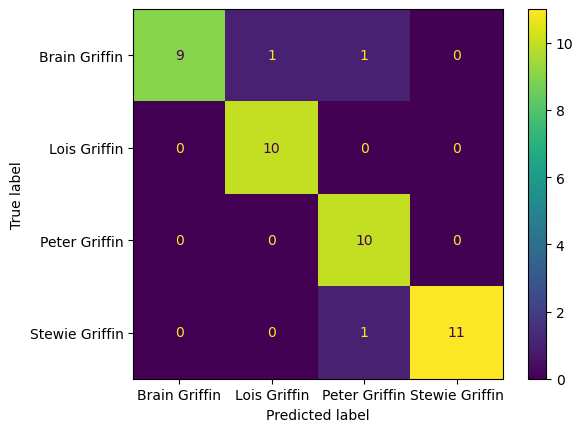

In [18]:

metrics.ConfusionMatrixDisplay.from_estimator(model,data['test_data'],data['test_labels'])
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=10,leaf_size=30, metric='minkowski',algorithm='auto')
knn.fit(data['training_data'],data['training_labels'])

KNeighborsClassifier(n_neighbors=10)

In [21]:
y_pred=knn.predict(data['test_data'])
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_pred,data['test_labels'])

0.8372093023255814

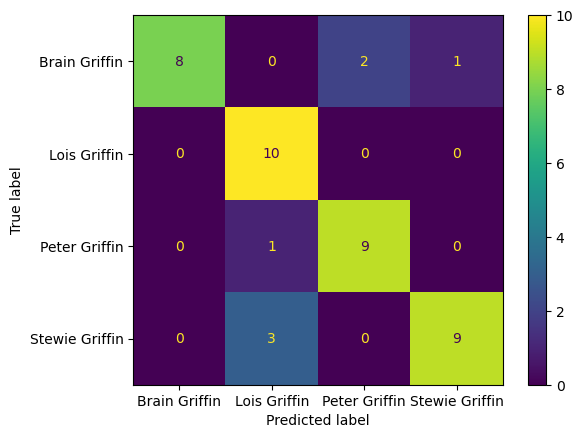

In [23]:
metrics.ConfusionMatrixDisplay.from_estimator(knn,data['test_data'],data['test_labels'])
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression(solver='lbfgs', max_iter=100,penalty='l2')

In [26]:
lr.fit(data['training_data'],data['training_labels'])

C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred=lr.predict(data['test_data'])

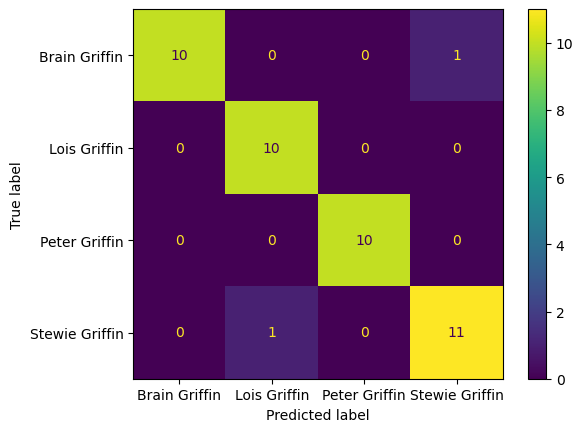

In [28]:
metrics.ConfusionMatrixDisplay.from_estimator(lr,data['test_data'],data['test_labels'])
plt.show()

In [29]:
accuracy_score(y_pred,data['test_labels'])

0.9534883720930233

In [30]:
import pickle as pkl

In [31]:
pkl.dump(model,open('model.pkl','wb'))

In [32]:
from sklearn.svm import SVC

In [33]:
sv=SVC(C=2,kernel='linear')
sv.fit(data['training_data'],data['training_labels'])

SVC(C=2, kernel='linear')

In [34]:
y_pred=sv.predict(data['test_data'])
accuracy_score(y_pred,data['test_labels'])

0.9767441860465116

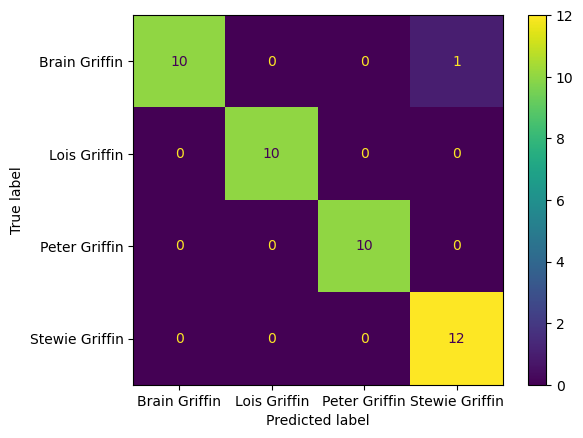

In [35]:
metrics.ConfusionMatrixDisplay.from_estimator(sv,data['test_data'],data['test_labels'])
plt.show()

In [36]:
pkl.dump(model,open('sv.pkl','wb'))

In [37]:
pkl.dump(model,open('lr.pkl','wb'))